In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')

# Set random seed for reproducibility
np.random.seed(42)
print("Libraries imported successfully!")

Libraries imported successfully!


## Step 1: Load Dataset and Handle Missing Values

In [2]:
# Load the fuel dataset
df = pd.read_csv('fuel.csv')

# Display basic information about the dataset
print("Dataset Shape:", df.shape)
print("\nColumn Names:")
print(df.columns.tolist())
print("\nFirst 5 rows:")
print(df.head())

print("\nDataset Info:")
print(df.info())

print("\nMissing Values:")
print(df.isnull().sum())

print("\nData Types:")
print(df.dtypes)

Dataset Shape: (22556, 13)

Column Names:
['YEAR', 'MAKE', 'MODEL', 'VEHICLE CLASS', 'ENGINE SIZE', 'CYLINDERS', 'TRANSMISSION', 'FUEL', 'FUEL CONSUMPTION', 'HWY (L/100 km)', 'COMB (L/100 km)', 'COMB (mpg)', 'EMISSIONS']

First 5 rows:
   YEAR   MAKE    MODEL VEHICLE CLASS  ENGINE SIZE  CYLINDERS TRANSMISSION  \
0  2000  ACURA    1.6EL       COMPACT          1.6          4           A4   
1  2000  ACURA    1.6EL       COMPACT          1.6          4           M5   
2  2000  ACURA    3.2TL      MID-SIZE          3.2          6          AS5   
3  2000  ACURA    3.5RL      MID-SIZE          3.5          6           A4   
4  2000  ACURA  INTEGRA    SUBCOMPACT          1.8          4           A4   

  FUEL  FUEL CONSUMPTION  HWY (L/100 km)  COMB (L/100 km)  COMB (mpg)  \
0    X               9.2             6.7              8.1          35   
1    X               8.5             6.5              7.6          37   
2    Z              12.2             7.4             10.0          28   
3  

## Step 2: Display Dataset Before and After Preprocessing

In [3]:
# Display dataset before preprocessing
print("=== DATASET BEFORE PREPROCESSING ===")
print(f"Shape: {df.shape}")
print(f"Missing values: {df.isnull().sum().sum()}")
print("\nFirst 5 rows:")
print(df.head())

# Preprocessing: Handle missing values and prepare numerical data
df_processed = df.copy()

# Handle missing values (if any)
df_processed = df_processed.dropna()

# Select only numerical columns for PCA
numerical_cols = ['ENGINE SIZE', 'CYLINDERS', 'FUEL CONSUMPTION', 'HWY (L/100 km)', 
                 'COMB (L/100 km)', 'COMB (mpg)', 'EMISSIONS']

# Check if all numerical columns exist
available_cols = [col for col in numerical_cols if col in df_processed.columns]
print(f"\nAvailable numerical columns: {available_cols}")

# Create the numerical dataset
df_numerical = df_processed[available_cols].copy()

# Handle any potential missing values in numerical columns
df_numerical = df_numerical.fillna(df_numerical.mean())

print("\n=== DATASET AFTER PREPROCESSING ===")
print(f"Shape: {df_numerical.shape}")
print(f"Missing values: {df_numerical.isnull().sum().sum()}")
print("\nFirst 5 rows:")
print(df_numerical.head())

print("\nStatistical Summary:")
print(df_numerical.describe())

=== DATASET BEFORE PREPROCESSING ===
Shape: (22556, 13)
Missing values: 0

First 5 rows:
   YEAR   MAKE    MODEL VEHICLE CLASS  ENGINE SIZE  CYLINDERS TRANSMISSION  \
0  2000  ACURA    1.6EL       COMPACT          1.6          4           A4   
1  2000  ACURA    1.6EL       COMPACT          1.6          4           M5   
2  2000  ACURA    3.2TL      MID-SIZE          3.2          6          AS5   
3  2000  ACURA    3.5RL      MID-SIZE          3.5          6           A4   
4  2000  ACURA  INTEGRA    SUBCOMPACT          1.8          4           A4   

  FUEL  FUEL CONSUMPTION  HWY (L/100 km)  COMB (L/100 km)  COMB (mpg)  \
0    X               9.2             6.7              8.1          35   
1    X               8.5             6.5              7.6          37   
2    Z              12.2             7.4             10.0          28   
3    Z              13.4             9.2             11.5          25   
4    X              10.0             7.0              8.6          33   

   

## Step 3: Standardize the Dataset

We'll use the standardization formula: **Z = (X - μ) / σ**

Where:
- Z = standardized value
- X = original value
- μ = mean of the feature
- σ = standard deviation of the feature

In [4]:
# Standardize the dataset using the formula: Z = (X - μ) / σ
def standardize_data(data):
    """
    Standardize data using Z-score normalization
    Z = (X - μ) / σ
    """
    # Calculate mean (μ) and standard deviation (σ) for each feature
    mean = np.mean(data, axis=0)
    std = np.std(data, axis=0)
    
    # Apply standardization formula
    standardized_data = (data - mean) / std
    
    return standardized_data, mean, std

# Convert to numpy array for easier manipulation
X = df_numerical.values
feature_names = df_numerical.columns.tolist()

print("=== BEFORE STANDARDIZATION ===")
print(f"Mean of features: {np.mean(X, axis=0)}")
print(f"Standard deviation of features: {np.std(X, axis=0)}")
print(f"Shape: {X.shape}")

# Apply standardization
X_standardized, original_mean, original_std = standardize_data(X)

print("\n=== AFTER STANDARDIZATION ===")
print(f"Mean of features: {np.mean(X_standardized, axis=0)}")
print(f"Standard deviation of features: {np.std(X_standardized, axis=0)}")
print(f"Shape: {X_standardized.shape}")

# Display first few rows of standardized data
print("\nFirst 5 rows of standardized data:")
standardized_df = pd.DataFrame(X_standardized, columns=feature_names)
print(standardized_df.head())

=== BEFORE STANDARDIZATION ===
Mean of features: [  3.35664568   5.85414081  12.76351303   8.91912573  11.0343412
  27.37453449 250.06845185]
Standard deviation of features: [ 1.33539557  1.81955696  3.50092121  2.27471343  2.91085544  7.37681821
 59.35396058]
Shape: (22556, 7)

=== AFTER STANDARDIZATION ===
Mean of features: [ 0.00000000e+00  2.01608153e-17 -2.01608153e-17  2.09168459e-16
  9.07236690e-17  3.02412230e-17  2.21768969e-16]
Standard deviation of features: [1. 1. 1. 1. 1. 1. 1.]
Shape: (22556, 7)

First 5 rows of standardized data:
   ENGINE SIZE  CYLINDERS  FUEL CONSUMPTION  HWY (L/100 km)  COMB (L/100 km)  \
0    -1.315450  -1.019007         -1.017879       -0.975563        -1.008068   
1    -1.315450  -1.019007         -1.217826       -1.063486        -1.179839   
2    -0.117303   0.080162         -0.160961       -0.667832        -0.355339   
3     0.107350   0.080162          0.181806        0.123477         0.159973   
4    -1.165681  -1.019007         -0.789367     

## Step 4: Calculate Covariance Matrix (Without Built-in Function)

Covariance matrix formula: **Cov(X,Y) = Σ[(xi - x̄)(yi - ȳ)] / (n-1)**

For a matrix, the covariance matrix C is calculated as: **C = (X^T × X) / (n-1)**

=== COVARIANCE MATRIX ===
Shape: (7, 7)

Covariance Matrix:
[[ 1.00004434  0.91341789  0.82164144  0.74942752  0.80735214 -0.7550352
   0.82132129]
 [ 0.91341789  1.00004434  0.79497775  0.69837486  0.77162128 -0.71424628
   0.80221187]
 [ 0.82164144  0.79497775  1.00004434  0.94239302  0.99300392 -0.92140143
   0.91914131]
 [ 0.74942752  0.69837486  0.94239302  1.00004434  0.97505749 -0.88478338
   0.89482034]
 [ 0.80735214  0.77162128  0.99300392  0.97505749  1.00004434 -0.9209557
   0.9230235 ]
 [-0.7550352  -0.71424628 -0.92140143 -0.88478338 -0.9209557   1.00004434
  -0.90188371]
 [ 0.82132129  0.80221187  0.91914131  0.89482034  0.9230235  -0.90188371
   1.00004434]]

=== COVARIANCE MATRIX (with feature names) ===
                  ENGINE SIZE  CYLINDERS  FUEL CONSUMPTION  HWY (L/100 km)  \
ENGINE SIZE          1.000044   0.913418          0.821641        0.749428   
CYLINDERS            0.913418   1.000044          0.794978        0.698375   
FUEL CONSUMPTION     0.821641   0.79

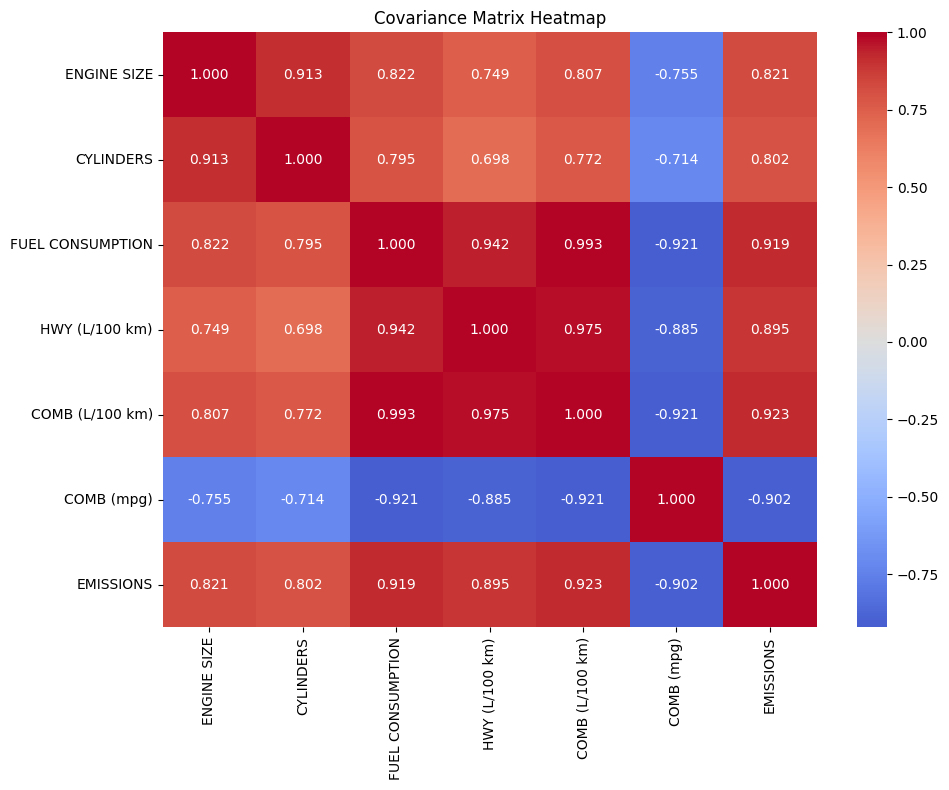


Diagonal elements (variances of standardized features):
[1.00004434 1.00004434 1.00004434 1.00004434 1.00004434 1.00004434
 1.00004434]


In [5]:
# Calculate covariance matrix manually (without built-in function)
def calculate_covariance_matrix(data):
    """
    Calculate covariance matrix manually
    Formula: C = (X^T × X) / (n-1)
    Where X is the centered data matrix
    """
    n_samples, n_features = data.shape
    
    # Since data is already standardized (centered), we can directly compute
    # C = (X^T × X) / (n-1)
    covariance_matrix = np.dot(data.T, data) / (n_samples - 1)
    
    return covariance_matrix

# Calculate covariance matrix
cov_matrix = calculate_covariance_matrix(X_standardized)

print("=== COVARIANCE MATRIX ===")
print(f"Shape: {cov_matrix.shape}")
print("\nCovariance Matrix:")
print(cov_matrix)

# Create a more readable display with feature names
cov_df = pd.DataFrame(cov_matrix, columns=feature_names, index=feature_names)
print("\n=== COVARIANCE MATRIX (with feature names) ===")
print(cov_df)

# Visualize the covariance matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cov_df, annot=True, cmap='coolwarm', center=0, fmt='.3f')
plt.title('Covariance Matrix Heatmap')
plt.tight_layout()
plt.show()

# Verify our calculation by comparing diagonal elements (should be close to 1 for standardized data)
print("\nDiagonal elements (variances of standardized features):")
print(np.diag(cov_matrix))

## Step 5: Calculate Eigenvalues and Eigenvectors (Without Built-in Function)

We'll implement the Power Iteration method to find eigenvalues and eigenvectors.

In [6]:
# Calculate eigenvalues and eigenvectors manually using power iteration method
def power_iteration(matrix, max_iterations=1000, tolerance=1e-6):
    """
    Find the largest eigenvalue and corresponding eigenvector using power iteration
    """
    n = matrix.shape[0]
    # Initialize with random vector
    vector = np.random.rand(n)
    
    for i in range(max_iterations):
        # Matrix-vector multiplication
        new_vector = np.dot(matrix, vector)
        
        # Calculate eigenvalue (Rayleigh quotient)
        eigenvalue = np.dot(vector, new_vector) / np.dot(vector, vector)
        
        # Normalize the vector
        new_vector = new_vector / np.linalg.norm(new_vector)
        
        # Check for convergence
        if np.allclose(vector, new_vector, atol=tolerance) or np.allclose(vector, -new_vector, atol=tolerance):
            break
            
        vector = new_vector
    
    return eigenvalue, vector

def deflation(matrix, eigenvalue, eigenvector):
    """
    Remove the found eigenvalue and eigenvector from the matrix
    """
    return matrix - eigenvalue * np.outer(eigenvector, eigenvector)

def calculate_eigenvalues_eigenvectors(matrix):
    """
    Calculate all eigenvalues and eigenvectors using power iteration and deflation
    """
    n = matrix.shape[0]
    eigenvalues = []
    eigenvectors = []
    
    # Work with a copy of the matrix
    current_matrix = matrix.copy()
    
    for i in range(n):
        # Find largest eigenvalue and eigenvector
        eigenvalue, eigenvector = power_iteration(current_matrix)
        
        eigenvalues.append(eigenvalue)
        eigenvectors.append(eigenvector)
        
        # Apply deflation to remove this eigenvalue/eigenvector
        current_matrix = deflation(current_matrix, eigenvalue, eigenvector)
    
    return np.array(eigenvalues), np.array(eigenvectors).T

# Calculate eigenvalues and eigenvectors
print("Calculating eigenvalues and eigenvectors manually...")
eigenvalues, eigenvectors = calculate_eigenvalues_eigenvectors(cov_matrix)

print("=== EIGENVALUES ===")
print(eigenvalues)

print("\n=== EIGENVECTORS ===")
print("Shape:", eigenvectors.shape)
print(eigenvectors)

# Verify our calculation using built-in function for comparison
print("\n=== VERIFICATION (using built-in function) ===")
true_eigenvalues, true_eigenvectors = np.linalg.eig(cov_matrix)
print("Built-in eigenvalues:", np.sort(true_eigenvalues)[::-1])
print("Our eigenvalues:", np.sort(eigenvalues)[::-1])

# Display eigenvalues with feature names for better understanding
eigen_df = pd.DataFrame({
    'Component': [f'PC{i+1}' for i in range(len(eigenvalues))],
    'Eigenvalue': eigenvalues,
    'Variance_Explained': eigenvalues / np.sum(eigenvalues) * 100
})
print("\n=== EIGENVALUES SUMMARY ===")
print(eigen_df)

Calculating eigenvalues and eigenvectors manually...
=== EIGENVALUES ===
[6.13206126e+00 5.17185228e-01 1.33935123e-01 9.32168349e-02
 8.31209513e-02 4.06380967e-02 1.52860501e-04]

=== EIGENVECTORS ===
Shape: (7, 7)
[[ 3.60393081e-01  5.44548057e-01  9.71321936e-02 -4.73976661e-01
   5.78738419e-01 -6.74637596e-02  7.48731456e-04]
 [ 3.49341139e-01  6.45146416e-01 -3.15774297e-03  2.82084147e-01
  -5.63377675e-01  2.54481292e-01 -8.99778769e-04]
 [ 3.94965361e-01 -1.64983126e-01  1.88705491e-01 -1.12670508e-01
  -2.89457508e-01 -6.35648677e-01  5.29757328e-01]
 [ 3.80137789e-01 -3.51306779e-01  4.87423361e-01  8.39449172e-02
   1.52806033e-01  6.21026137e-01  2.80068945e-01]
 [ 3.95037180e-01 -2.32529864e-01  2.94574150e-01 -4.51886514e-02
  -1.36385952e-01 -2.03839888e-01 -8.00572113e-01]
 [-3.76919100e-01  2.79489767e-01  6.96151017e-01  4.39014772e-01
   1.83905252e-01 -2.61981069e-01 -4.18228877e-04]
 [ 3.86591309e-01 -6.65805070e-02 -3.82052225e-01  6.93727095e-01
   4.33716308e-

## Step 6: Sort Eigenvalues and Their Corresponding Eigenvectors

We'll sort the eigenvalues in descending order and arrange eigenvectors accordingly.

=== SORTED EIGENVALUES (Descending Order) ===
[6.13206126e+00 5.17185228e-01 1.33935123e-01 9.32168349e-02
 8.31209513e-02 4.06380967e-02 1.52860501e-04]

=== SORTED EIGENVECTORS ===
Shape: (7, 7)
[[ 3.60393081e-01  5.44548057e-01  9.71321936e-02 -4.73976661e-01
   5.78738419e-01 -6.74637596e-02  7.48731456e-04]
 [ 3.49341139e-01  6.45146416e-01 -3.15774297e-03  2.82084147e-01
  -5.63377675e-01  2.54481292e-01 -8.99778769e-04]
 [ 3.94965361e-01 -1.64983126e-01  1.88705491e-01 -1.12670508e-01
  -2.89457508e-01 -6.35648677e-01  5.29757328e-01]
 [ 3.80137789e-01 -3.51306779e-01  4.87423361e-01  8.39449172e-02
   1.52806033e-01  6.21026137e-01  2.80068945e-01]
 [ 3.95037180e-01 -2.32529864e-01  2.94574150e-01 -4.51886514e-02
  -1.36385952e-01 -2.03839888e-01 -8.00572113e-01]
 [-3.76919100e-01  2.79489767e-01  6.96151017e-01  4.39014772e-01
   1.83905252e-01 -2.61981069e-01 -4.18228877e-04]
 [ 3.86591309e-01 -6.65805070e-02 -3.82052225e-01  6.93727095e-01
   4.33716308e-01 -1.75443520e-01  

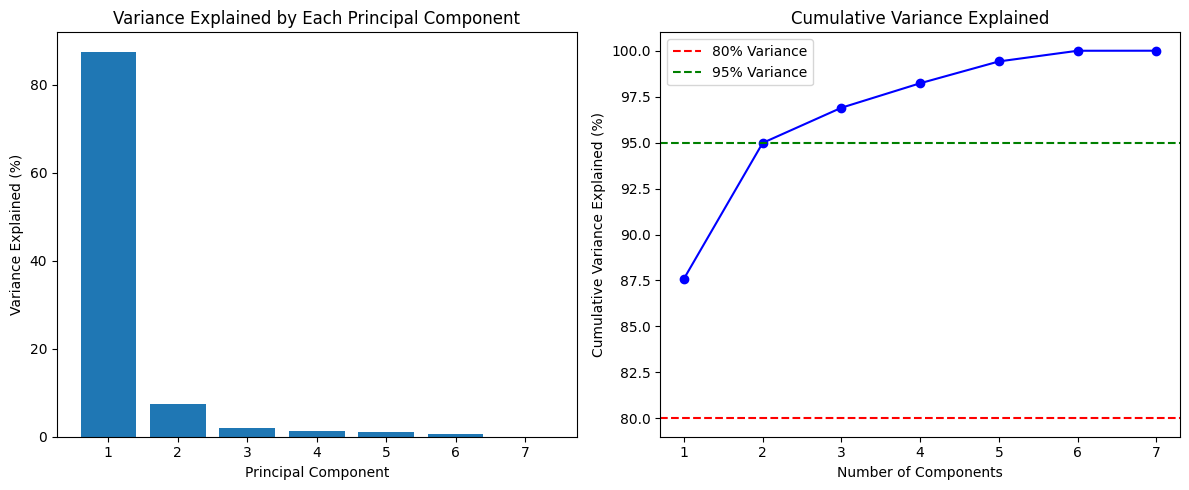

In [7]:
# Sort eigenvalues and eigenvectors in descending order
def sort_eigenvalues_eigenvectors(eigenvalues, eigenvectors):
    """
    Sort eigenvalues and eigenvectors in descending order of eigenvalues
    """
    # Get indices that would sort eigenvalues in descending order
    sorted_indices = np.argsort(eigenvalues)[::-1]
    
    # Sort eigenvalues and eigenvectors
    sorted_eigenvalues = eigenvalues[sorted_indices]
    sorted_eigenvectors = eigenvectors[:, sorted_indices]
    
    return sorted_eigenvalues, sorted_eigenvectors

# Sort eigenvalues and eigenvectors
sorted_eigenvalues, sorted_eigenvectors = sort_eigenvalues_eigenvectors(eigenvalues, eigenvectors)

print("=== SORTED EIGENVALUES (Descending Order) ===")
print(sorted_eigenvalues)

print("\n=== SORTED EIGENVECTORS ===")
print("Shape:", sorted_eigenvectors.shape)
print(sorted_eigenvectors)

# Calculate variance explained by each component
variance_explained = sorted_eigenvalues / np.sum(sorted_eigenvalues) * 100
cumulative_variance = np.cumsum(variance_explained)

# Create a comprehensive summary
sorted_eigen_df = pd.DataFrame({
    'Principal_Component': [f'PC{i+1}' for i in range(len(sorted_eigenvalues))],
    'Eigenvalue': sorted_eigenvalues,
    'Variance_Explained_%': variance_explained,
    'Cumulative_Variance_%': cumulative_variance
})

print("\n=== SORTED EIGENVALUES SUMMARY ===")
print(sorted_eigen_df)

# Visualize the variance explained
plt.figure(figsize=(12, 5))

# Plot 1: Variance explained by each component
plt.subplot(1, 2, 1)
plt.bar(range(1, len(sorted_eigenvalues) + 1), variance_explained)
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained (%)')
plt.title('Variance Explained by Each Principal Component')
plt.xticks(range(1, len(sorted_eigenvalues) + 1))

# Plot 2: Cumulative variance explained
plt.subplot(1, 2, 2)
plt.plot(range(1, len(sorted_eigenvalues) + 1), cumulative_variance, 'bo-')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Variance Explained (%)')
plt.title('Cumulative Variance Explained')
plt.xticks(range(1, len(sorted_eigenvalues) + 1))
plt.axhline(y=80, color='r', linestyle='--', label='80% Variance')
plt.axhline(y=95, color='g', linestyle='--', label='95% Variance')
plt.legend()

plt.tight_layout()
plt.show()

## Step 7: Pick k Eigenvalues and Form Matrix of Eigenvectors

We'll select the top k components that explain most of the variance.

In [8]:
# Select top k components
def select_top_k_components(eigenvalues, eigenvectors, k=None, variance_threshold=0.95):
    """
    Select top k components or components that explain specified variance
    """
    if k is None:
        # Select components based on variance threshold
        variance_explained = eigenvalues / np.sum(eigenvalues)
        cumulative_variance = np.cumsum(variance_explained)
        k = np.argmax(cumulative_variance >= variance_threshold) + 1
        print(f"Selected {k} components to explain {variance_threshold*100}% variance")
    
    # Select top k eigenvalues and eigenvectors
    top_k_eigenvalues = eigenvalues[:k]
    top_k_eigenvectors = eigenvectors[:, :k]
    
    return top_k_eigenvalues, top_k_eigenvectors, k

# Let's try different values of k
print("=== SELECTING TOP K COMPONENTS ===")

# Option 1: Select components that explain 95% variance
k_95_eigenvalues, k_95_eigenvectors, k_95 = select_top_k_components(
    sorted_eigenvalues, sorted_eigenvectors, variance_threshold=0.95
)

# Option 2: Select components that explain 80% variance
k_80_eigenvalues, k_80_eigenvectors, k_80 = select_top_k_components(
    sorted_eigenvalues, sorted_eigenvectors, variance_threshold=0.80
)

# Option 3: Select top 2 components for visualization
k_2_eigenvalues, k_2_eigenvectors, k_2 = select_top_k_components(
    sorted_eigenvalues, sorted_eigenvectors, k=2
)

print(f"\nFor 95% variance: k = {k_95}")
print(f"For 80% variance: k = {k_80}")
print(f"For visualization: k = {k_2}")

# Display the selected components
print(f"\n=== TOP {k_2} COMPONENTS (for visualization) ===")
print("Selected Eigenvalues:")
print(k_2_eigenvalues)
print(f"Variance explained: {k_2_eigenvalues.sum()/sorted_eigenvalues.sum()*100:.2f}%")

print("\nSelected Eigenvectors (Transformation Matrix):")
print(f"Shape: {k_2_eigenvectors.shape}")
print(k_2_eigenvectors)

# Create a dataframe to show the eigenvector components
eigenvector_df = pd.DataFrame(
    k_2_eigenvectors,
    columns=[f'PC{i+1}' for i in range(k_2)],
    index=feature_names
)
print("\n=== EIGENVECTOR COMPONENTS ===")
print(eigenvector_df)

# We'll use k=2 for visualization, but let's also prepare other options
print(f"\n=== PREPARING DIFFERENT K VALUES ===")
print(f"k=2: {k_2_eigenvalues.sum()/sorted_eigenvalues.sum()*100:.2f}% variance")
print(f"k={k_80}: {k_80_eigenvalues.sum()/sorted_eigenvalues.sum()*100:.2f}% variance")
print(f"k={k_95}: {k_95_eigenvalues.sum()/sorted_eigenvalues.sum()*100:.2f}% variance")

=== SELECTING TOP K COMPONENTS ===
Selected 3 components to explain 95.0% variance
Selected 1 components to explain 80.0% variance

For 95% variance: k = 3
For 80% variance: k = 1
For visualization: k = 2

=== TOP 2 COMPONENTS (for visualization) ===
Selected Eigenvalues:
[6.13206126 0.51718523]
Variance explained: 94.99%

Selected Eigenvectors (Transformation Matrix):
Shape: (7, 2)
[[ 0.36039308  0.54454806]
 [ 0.34934114  0.64514642]
 [ 0.39496536 -0.16498313]
 [ 0.38013779 -0.35130678]
 [ 0.39503718 -0.23252986]
 [-0.3769191   0.27948977]
 [ 0.38659131 -0.06658051]]

=== EIGENVECTOR COMPONENTS ===
                       PC1       PC2
ENGINE SIZE       0.360393  0.544548
CYLINDERS         0.349341  0.645146
FUEL CONSUMPTION  0.394965 -0.164983
HWY (L/100 km)    0.380138 -0.351307
COMB (L/100 km)   0.395037 -0.232530
COMB (mpg)       -0.376919  0.279490
EMISSIONS         0.386591 -0.066581

=== PREPARING DIFFERENT K VALUES ===
k=2: 94.99% variance
k=1: 87.60% variance
k=3: 96.90% vari

## Step 8: Transform the Original Matrix

We'll use the formula: **Y = X × W**

Where:
- Y = transformed data
- X = standardized original data
- W = top k eigenvectors (transformation matrix)

In [9]:
# Transform the original matrix using the formula: Y = X * W
def transform_data(data, eigenvectors):
    """
    Transform data using eigenvectors
    Y = X * W
    """
    transformed_data = np.dot(data, eigenvectors)
    return transformed_data

# Transform data with different k values
print("=== TRANSFORMING DATA ===")

# Transform with k=2 (for visualization)
X_transformed_2d = transform_data(X_standardized, k_2_eigenvectors)
print(f"2D Transformation - Original shape: {X_standardized.shape} -> Transformed shape: {X_transformed_2d.shape}")

# Transform with k for 80% variance
X_transformed_80 = transform_data(X_standardized, k_80_eigenvectors)
print(f"80% Variance Transformation - Original shape: {X_standardized.shape} -> Transformed shape: {X_transformed_80.shape}")

# Transform with k for 95% variance
X_transformed_95 = transform_data(X_standardized, k_95_eigenvectors)
print(f"95% Variance Transformation - Original shape: {X_standardized.shape} -> Transformed shape: {X_transformed_95.shape}")

print("\n=== VERIFICATION OF TRANSFORMATION ===")
print("Original data (first 5 rows):")
print(X_standardized[:5])

print("\nTransformed data to 2D (first 5 rows):")
print(X_transformed_2d[:5])

print(f"\nTransformed data to {k_80}D (first 5 rows):")
print(X_transformed_80[:5])

# Calculate the variance of each principal component in the transformed data
pc_variances = np.var(X_transformed_2d, axis=0)
print(f"\nVariance of each principal component in 2D transformed data:")
print(f"PC1 variance: {pc_variances[0]:.4f}")
print(f"PC2 variance: {pc_variances[1]:.4f}")

# These should match our eigenvalues
print(f"\nComparison with eigenvalues:")
print(f"Eigenvalue 1: {k_2_eigenvalues[0]:.4f}")
print(f"Eigenvalue 2: {k_2_eigenvalues[1]:.4f}")

# Create DataFrames for better visualization
transformed_2d_df = pd.DataFrame(X_transformed_2d, columns=['PC1', 'PC2'])
print("\n=== TRANSFORMED DATA (2D) - First 10 rows ===")
print(transformed_2d_df.head(10))

=== TRANSFORMING DATA ===
2D Transformation - Original shape: (22556, 7) -> Transformed shape: (22556, 2)
80% Variance Transformation - Original shape: (22556, 7) -> Transformed shape: (22556, 1)
95% Variance Transformation - Original shape: (22556, 7) -> Transformed shape: (22556, 3)

=== VERIFICATION OF TRANSFORMATION ===
Original data (first 5 rows):
[[-1.31544968 -1.01900674 -1.01787867 -0.97556277 -1.00806833  1.03370658
  -1.0794301 ]
 [-1.31544968 -1.01900674 -1.21782605 -1.06348593 -1.17983914  1.30482618
  -1.26475893]
 [-0.11730283  0.08016193 -0.16096136 -0.6678317  -0.35533925  0.08478798
  -0.33811479]
 [ 0.1073497   0.08016193  0.18180557  0.12347677  0.15997318 -0.32189142
   0.23471977]
 [-1.16568133 -1.01900674 -0.78936739 -0.84367802 -0.83629752  0.76258698
  -0.8772532 ]]

Transformed data to 2D (first 5 rows):
[[-2.80808155 -0.26789409]
 [-3.16216928 -0.07596186]
 [-0.63475616  0.37784508]
 [ 0.46070004 -0.10599149]
 [-2.36551181 -0.39954857]]

Transformed data to 1

## Step 9: Display the Transformed Data

Let's examine the transformed data in detail.

In [10]:
# Display and analyze the transformed data
print("=== TRANSFORMED DATA ANALYSIS ===")

# 2D Transformed Data
print("2D TRANSFORMED DATA:")
print(f"Shape: {X_transformed_2d.shape}")
print(f"Mean: {np.mean(X_transformed_2d, axis=0)}")
print(f"Standard deviation: {np.std(X_transformed_2d, axis=0)}")

print("\nFirst 10 rows of 2D transformed data:")
print(transformed_2d_df.head(10))

print("\nStatistical summary of 2D transformed data:")
print(transformed_2d_df.describe())

# Create comparison between original and transformed data
print("\n=== COMPARISON: ORIGINAL vs TRANSFORMED ===")
print(f"Original data shape: {X_standardized.shape}")
print(f"2D transformed data shape: {X_transformed_2d.shape}")
print(f"Dimensionality reduction: {X_standardized.shape[1]} -> {X_transformed_2d.shape[1]}")
print(f"Variance preserved: {(k_2_eigenvalues.sum()/sorted_eigenvalues.sum()*100):.2f}%")

# Show the range of values
print(f"\nOriginal data range:")
print(f"Min: {np.min(X_standardized, axis=0)}")
print(f"Max: {np.max(X_standardized, axis=0)}")

print(f"\nTransformed data range:")
print(f"Min: {np.min(X_transformed_2d, axis=0)}")
print(f"Max: {np.max(X_transformed_2d, axis=0)}")

# Create a detailed DataFrame with additional information
sample_comparison = pd.DataFrame({
    'Sample': range(1, 11),
    'PC1': X_transformed_2d[:10, 0],
    'PC2': X_transformed_2d[:10, 1],
    'Distance_from_origin': np.sqrt(X_transformed_2d[:10, 0]**2 + X_transformed_2d[:10, 1]**2)
})

print("\n=== SAMPLE COMPARISON (First 10 samples) ===")
print(sample_comparison)

# Calculate correlation between principal components (should be 0)
correlation = np.corrcoef(X_transformed_2d[:, 0], X_transformed_2d[:, 1])[0, 1]
print(f"\nCorrelation between PC1 and PC2: {correlation:.6f}")
print("(Should be close to 0, indicating orthogonal components)")

# Show the loadings (eigenvectors) for interpretation
print("\n=== PRINCIPAL COMPONENT LOADINGS ===")
loadings_df = pd.DataFrame(
    k_2_eigenvectors,
    columns=['PC1_Loading', 'PC2_Loading'],
    index=feature_names
)
print(loadings_df)

print("\n=== INTERPRETATION OF PRINCIPAL COMPONENTS ===")
print("PC1 (First Principal Component) - Highest loadings:")
pc1_loadings = loadings_df['PC1_Loading'].abs().sort_values(ascending=False)
print(pc1_loadings.head(3))

print("\nPC2 (Second Principal Component) - Highest loadings:")
pc2_loadings = loadings_df['PC2_Loading'].abs().sort_values(ascending=False)
print(pc2_loadings.head(3))

=== TRANSFORMED DATA ANALYSIS ===
2D TRANSFORMED DATA:
Shape: (22556, 2)
Mean: [-1.10875132e-15  3.08387628e-16]
Standard deviation: [2.47624502 0.71913997]

First 10 rows of 2D transformed data:
        PC1       PC2
0 -2.808082 -0.267894
1 -3.162169 -0.075962
2 -0.634756  0.377845
3  0.460700 -0.105991
4 -2.365512 -0.399549
5 -2.641907 -0.255736
6 -2.570604 -0.301568
7  0.432531 -0.368548
8  0.518956 -0.291205
9 -1.768452 -0.704406

Statistical summary of 2D transformed data:
                PC1           PC2
count  2.255600e+04  2.255600e+04
mean   1.814473e-16 -1.260051e-16
std    2.476300e+00  7.191559e-01
min   -7.823497e+00 -3.237698e+00
25%   -1.830920e+00 -4.706457e-01
50%   -2.885318e-01 -2.764285e-02
75%    1.650217e+00  4.084184e-01
max    1.239423e+01  2.797468e+00

=== COMPARISON: ORIGINAL vs TRANSFORMED ===
Original data shape: (22556, 7)
2D transformed data shape: (22556, 2)
Dimensionality reduction: 7 -> 2
Variance preserved: 94.99%

Original data range:
Min: [-1.91452

## Step 10: Visualize the Data in Reduced Dimensional Space

Let's create comprehensive visualizations of our PCA results.

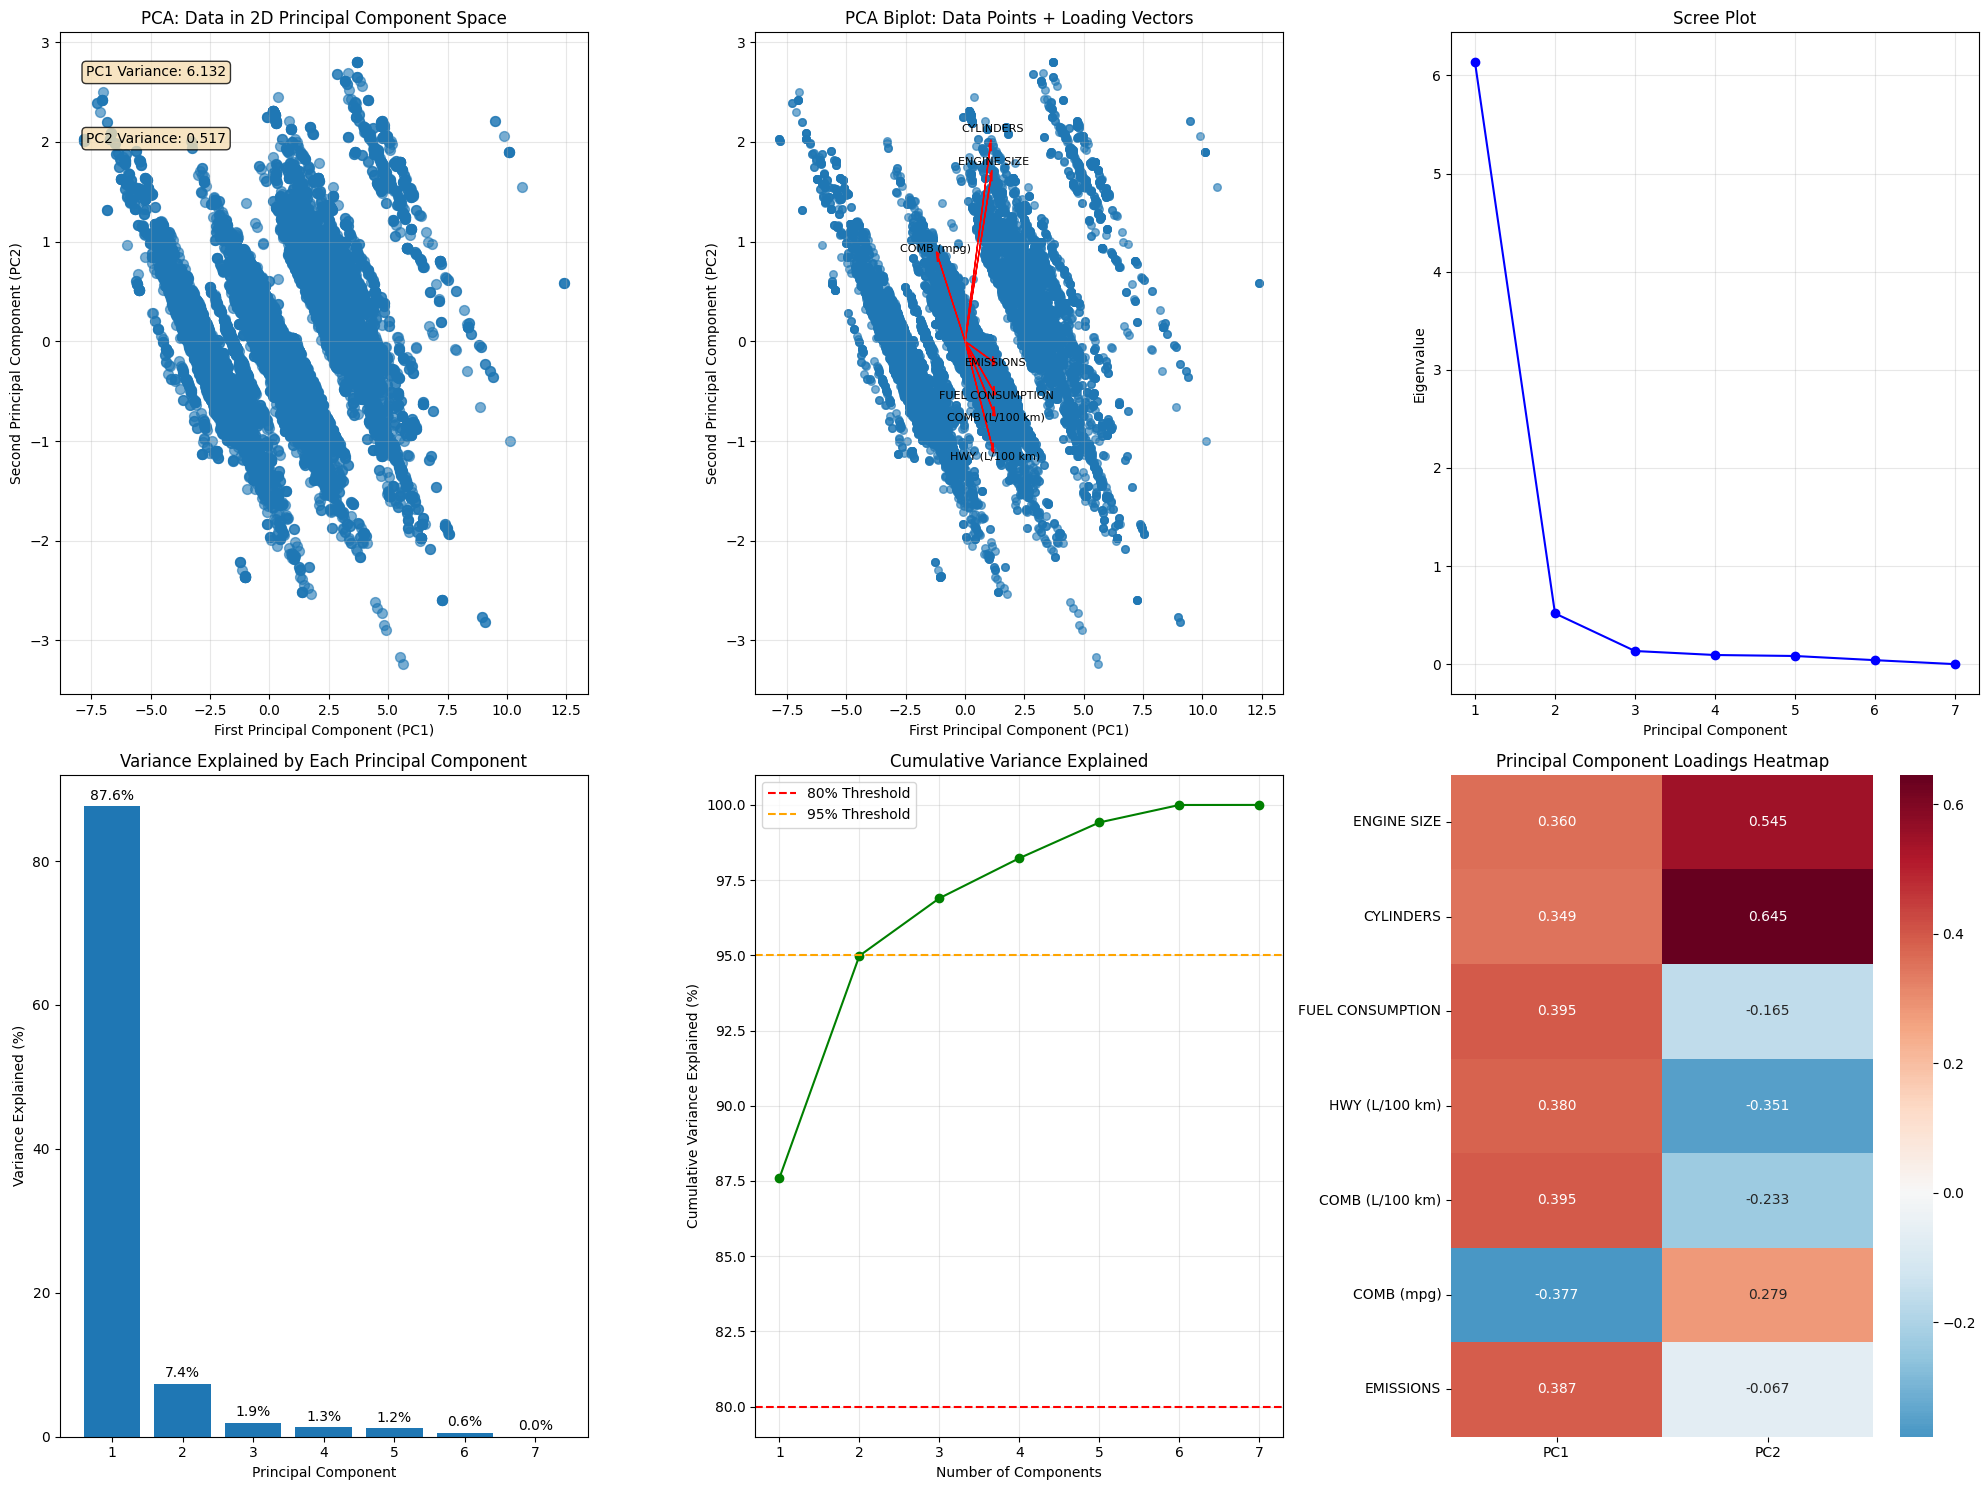

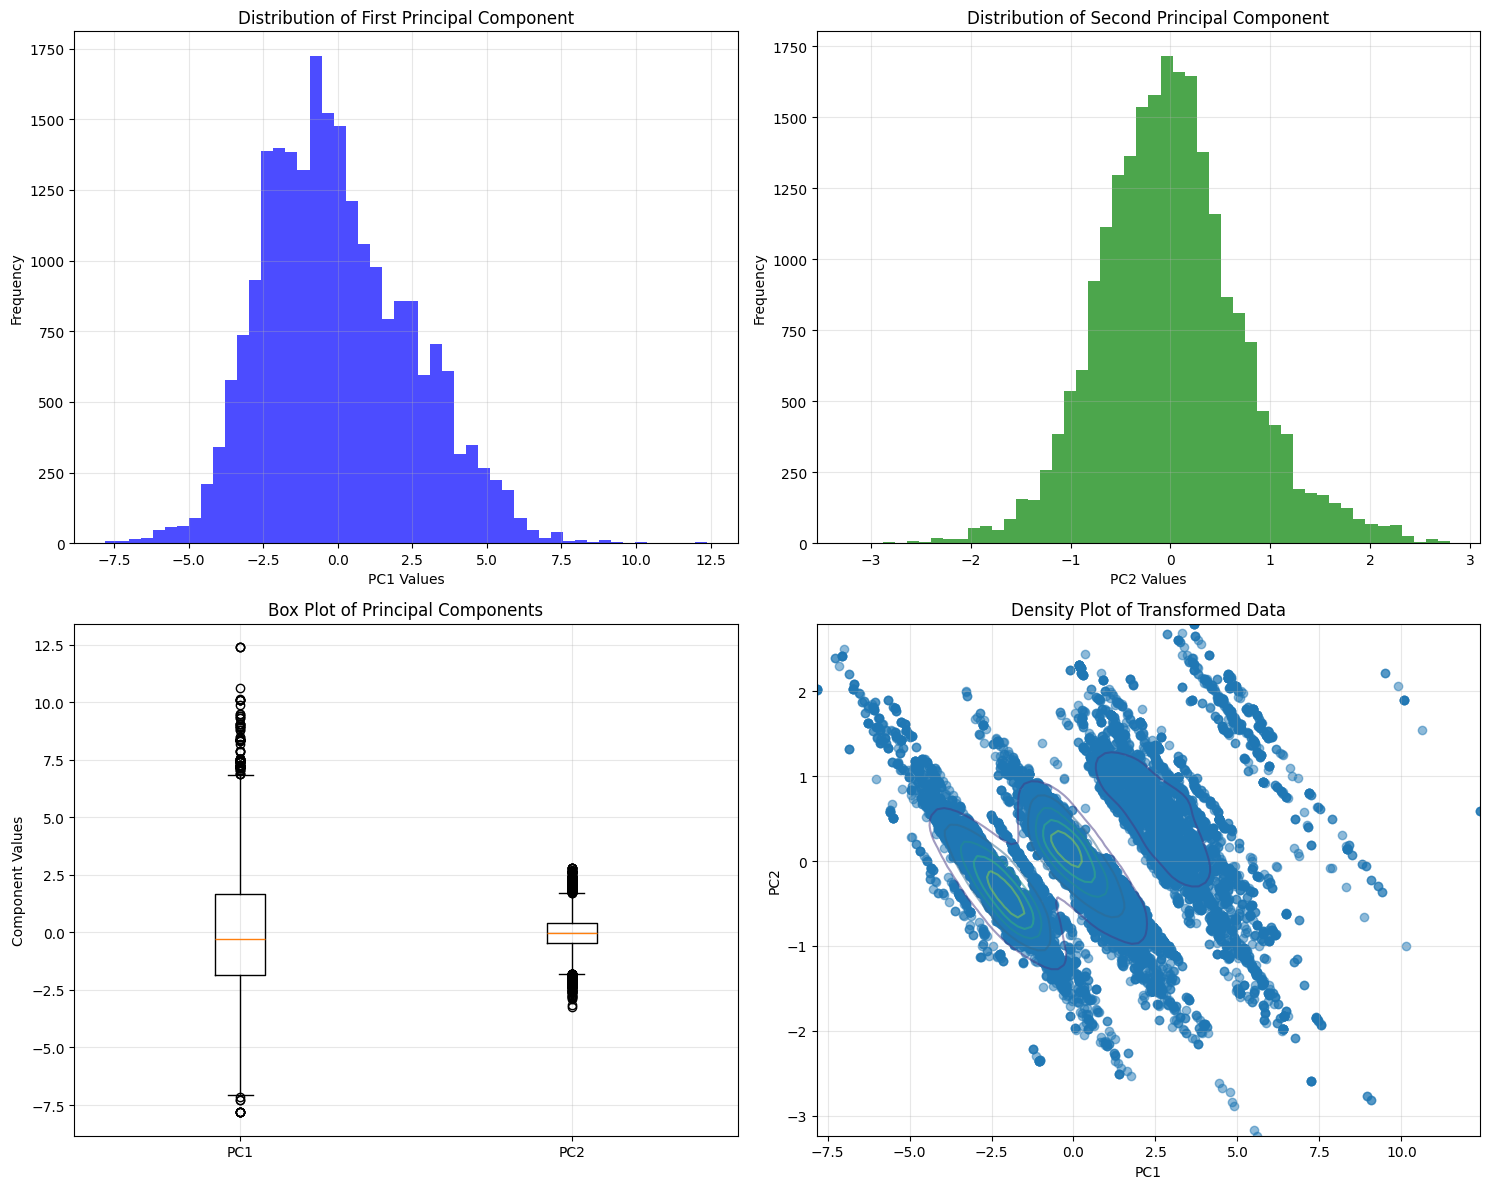

=== FINAL PCA SUMMARY ===
Original dimensions: 7
Reduced dimensions: 2
Variance preserved by PC1: 87.60%
Variance preserved by PC2: 7.39%
Total variance preserved: 94.99%
Compression ratio: 28.6%

=== FINAL SUMMARY TABLE ===
                    Metric Value
       Original Dimensions     7
        Reduced Dimensions     2
                   Samples 22556
            PC1 Variance % 87.60
            PC2 Variance %  7.39
Total Variance Preserved % 94.99
       Compression Ratio %  28.6


In [11]:
# Create comprehensive visualizations
plt.style.use('default')
fig = plt.figure(figsize=(20, 15))

# 1. Scatter plot of transformed data in 2D space
plt.subplot(2, 3, 1)
plt.scatter(X_transformed_2d[:, 0], X_transformed_2d[:, 1], alpha=0.6, s=50)
plt.xlabel('First Principal Component (PC1)')
plt.ylabel('Second Principal Component (PC2)')
plt.title('PCA: Data in 2D Principal Component Space')
plt.grid(True, alpha=0.3)

# Add statistics to the plot
plt.text(0.05, 0.95, f'PC1 Variance: {k_2_eigenvalues[0]:.3f}', 
         transform=plt.gca().transAxes, verticalalignment='top',
         bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))
plt.text(0.05, 0.85, f'PC2 Variance: {k_2_eigenvalues[1]:.3f}', 
         transform=plt.gca().transAxes, verticalalignment='top',
         bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))

# 2. Biplot (scatter plot + loading vectors)
plt.subplot(2, 3, 2)
# Plot data points
plt.scatter(X_transformed_2d[:, 0], X_transformed_2d[:, 1], alpha=0.6, s=30)

# Plot loading vectors
scale_factor = 3  # Scale factor for visualization
for i, feature in enumerate(feature_names):
    plt.arrow(0, 0, 
              k_2_eigenvectors[i, 0] * scale_factor, 
              k_2_eigenvectors[i, 1] * scale_factor,
              head_width=0.1, head_length=0.1, fc='red', ec='red')
    plt.text(k_2_eigenvectors[i, 0] * scale_factor * 1.1,
             k_2_eigenvectors[i, 1] * scale_factor * 1.1,
             feature, fontsize=8, ha='center', va='center')

plt.xlabel('First Principal Component (PC1)')
plt.ylabel('Second Principal Component (PC2)')
plt.title('PCA Biplot: Data Points + Loading Vectors')
plt.grid(True, alpha=0.3)

# 3. Scree plot
plt.subplot(2, 3, 3)
plt.plot(range(1, len(sorted_eigenvalues) + 1), sorted_eigenvalues, 'bo-')
plt.xlabel('Principal Component')
plt.ylabel('Eigenvalue')
plt.title('Scree Plot')
plt.grid(True, alpha=0.3)
plt.xticks(range(1, len(sorted_eigenvalues) + 1))

# 4. Variance explained bar plot
plt.subplot(2, 3, 4)
variance_explained = sorted_eigenvalues / np.sum(sorted_eigenvalues) * 100
plt.bar(range(1, len(sorted_eigenvalues) + 1), variance_explained)
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained (%)')
plt.title('Variance Explained by Each Principal Component')
plt.xticks(range(1, len(sorted_eigenvalues) + 1))

# Add percentage labels on bars
for i, v in enumerate(variance_explained):
    plt.text(i + 1, v + 0.5, f'{v:.1f}%', ha='center', va='bottom')

# 5. Cumulative variance plot
plt.subplot(2, 3, 5)
cumulative_variance = np.cumsum(variance_explained)
plt.plot(range(1, len(sorted_eigenvalues) + 1), cumulative_variance, 'go-')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Variance Explained (%)')
plt.title('Cumulative Variance Explained')
plt.axhline(y=80, color='r', linestyle='--', label='80% Threshold')
plt.axhline(y=95, color='orange', linestyle='--', label='95% Threshold')
plt.legend()
plt.grid(True, alpha=0.3)
plt.xticks(range(1, len(sorted_eigenvalues) + 1))

# 6. Loadings heatmap
plt.subplot(2, 3, 6)
sns.heatmap(k_2_eigenvectors, annot=True, cmap='RdBu_r', center=0, 
            xticklabels=['PC1', 'PC2'], yticklabels=feature_names,
            fmt='.3f')
plt.title('Principal Component Loadings Heatmap')

plt.tight_layout()
plt.show()

# Additional detailed visualizations
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Histogram of PC1
axes[0, 0].hist(X_transformed_2d[:, 0], bins=50, alpha=0.7, color='blue')
axes[0, 0].set_xlabel('PC1 Values')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].set_title('Distribution of First Principal Component')
axes[0, 0].grid(True, alpha=0.3)

# Histogram of PC2
axes[0, 1].hist(X_transformed_2d[:, 1], bins=50, alpha=0.7, color='green')
axes[0, 1].set_xlabel('PC2 Values')
axes[0, 1].set_ylabel('Frequency')
axes[0, 1].set_title('Distribution of Second Principal Component')
axes[0, 1].grid(True, alpha=0.3)

# Box plot of both components
axes[1, 0].boxplot([X_transformed_2d[:, 0], X_transformed_2d[:, 1]], 
                   labels=['PC1', 'PC2'])
axes[1, 0].set_ylabel('Component Values')
axes[1, 0].set_title('Box Plot of Principal Components')
axes[1, 0].grid(True, alpha=0.3)

# Density plot
axes[1, 1].scatter(X_transformed_2d[:, 0], X_transformed_2d[:, 1], alpha=0.5)
axes[1, 1].set_xlabel('PC1')
axes[1, 1].set_ylabel('PC2')
axes[1, 1].set_title('Density Plot of Transformed Data')
axes[1, 1].grid(True, alpha=0.3)

# Add contour lines for density
from scipy.stats import gaussian_kde
# Create a density estimation
kde = gaussian_kde(X_transformed_2d.T)
x_range = np.linspace(X_transformed_2d[:, 0].min(), X_transformed_2d[:, 0].max(), 100)
y_range = np.linspace(X_transformed_2d[:, 1].min(), X_transformed_2d[:, 1].max(), 100)
X_grid, Y_grid = np.meshgrid(x_range, y_range)
positions = np.vstack([X_grid.ravel(), Y_grid.ravel()])
Z = kde(positions).reshape(X_grid.shape)
axes[1, 1].contour(X_grid, Y_grid, Z, levels=5, alpha=0.5)

plt.tight_layout()
plt.show()

# Summary statistics
print("=== FINAL PCA SUMMARY ===")
print(f"Original dimensions: {X_standardized.shape[1]}")
print(f"Reduced dimensions: {X_transformed_2d.shape[1]}")
print(f"Variance preserved by PC1: {k_2_eigenvalues[0]/sorted_eigenvalues.sum()*100:.2f}%")
print(f"Variance preserved by PC2: {k_2_eigenvalues[1]/sorted_eigenvalues.sum()*100:.2f}%")
print(f"Total variance preserved: {k_2_eigenvalues.sum()/sorted_eigenvalues.sum()*100:.2f}%")
print(f"Compression ratio: {X_transformed_2d.shape[1]/X_standardized.shape[1]*100:.1f}%")

# Create final summary DataFrame
final_summary = pd.DataFrame({
    'Metric': ['Original Dimensions', 'Reduced Dimensions', 'Samples', 
               'PC1 Variance %', 'PC2 Variance %', 'Total Variance Preserved %',
               'Compression Ratio %'],
    'Value': [X_standardized.shape[1], X_transformed_2d.shape[1], X_standardized.shape[0],
              f"{k_2_eigenvalues[0]/sorted_eigenvalues.sum()*100:.2f}",
              f"{k_2_eigenvalues[1]/sorted_eigenvalues.sum()*100:.2f}",
              f"{k_2_eigenvalues.sum()/sorted_eigenvalues.sum()*100:.2f}",
              f"{X_transformed_2d.shape[1]/X_standardized.shape[1]*100:.1f}"]
})

print("\n=== FINAL SUMMARY TABLE ===")
print(final_summary.to_string(index=False))